In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
titanic_data = pd.read_csv("C:/Users/aansh/Downloads/train.csv")

In [23]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
import seaborn as sns

C:\Users\aansh\AppData\Local\Temp\ipykernel_10772\1292563686.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr())


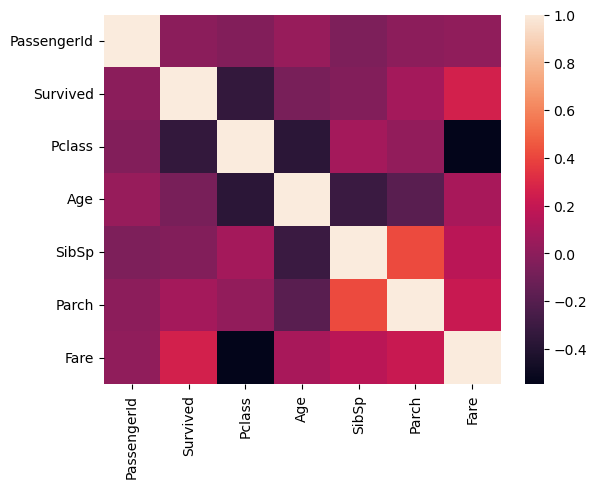

In [27]:
sns.heatmap(titanic_data.corr())
plt.show()

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size =0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived","Pclass","Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]
    


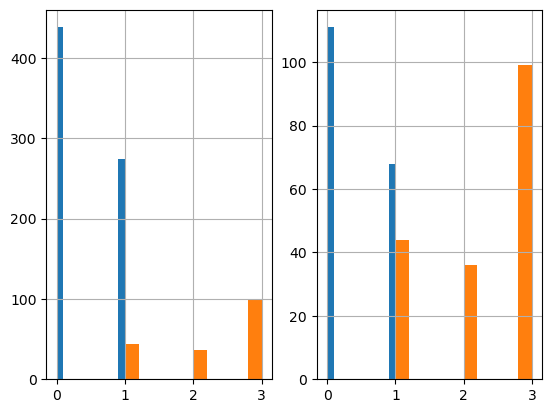

In [34]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_test_set['Pclass'].hist()
plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()
plt.show()


In [35]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 238 to 387
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          569 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        163 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [38]:
from sklearn.base import BaseEstimator ,TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [42]:
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator,TransformerMixin):
     def fit(self,X,y=None):
        return self
    
     def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toArray()
        column_names = ["C","S","Q","N"]
        
        for i in range(len(Matrix.T)):
            X[column_names[i]] = matrix.T[i] 
            matrix = encoder.fit_transform(X[['Sex']]).toArray()
            X[column_names] = ["Female","Male"]
            
        for i in range(len(Matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        return X

In [45]:
class FeatureDropper(BaseEstimator,TransformerMixin):
     def fit(self,X,y=None):
        return self
     def transform(self,X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"], axis=1,errors = "ignore")
    

In [46]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("ageimputer",AgeImputer()),("featureencoder",FeatureEncoder()),("featuredropper",FeatureDropper())])

In [49]:
strat_train_set = pipeline.fit_transform(strat_train_set)

AttributeError: toArray not found

In [50]:
strat_train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
238,239,0,2,"Pengelly, Mr. Frederick William",male,19.00000,0,0,28665,10.5000,NaN,S
619,620,0,2,"Gavey, Mr. Lawrence",male,26.00000,0,0,31028,10.5000,NaN,S
458,459,1,2,"Toomey, Miss. Ellen",female,50.00000,0,0,F.C.C. 13531,10.5000,NaN,S
726,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.00000,3,0,31027,21.0000,NaN,S
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.00000,0,0,S.O.C. 14879,73.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00000,5,2,CA 2144,46.9000,NaN,S
468,469,0,3,"Scanlan, Mr. James",male,29.86058,0,0,36209,7.7250,NaN,Q
269,270,1,1,"Bissette, Miss. Amelia",female,35.00000,0,0,PC 17760,135.6333,C99,S
540,541,1,1,"Crosby, Miss. Harriet R",female,36.00000,0,2,WE/P 5735,71.0000,B22,S


In [51]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 238 to 387
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        163 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [54]:
from sklearn.preprocessing import StandardScaler
X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']
Scaler = StandardScaler()
X_data = Scaler.fit_transform(X)
y_data = y.to_numpy()


ValueError: could not convert string to float: 'Pengelly, Mr. Frederick William'

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
param_gird = [
    {"n estimators":[10,100,200,500],"max_depth":["none",5,10],"min_samples_split":[2,3,4]}
]
grid_search = GridSearchCV(clf,param_gird,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data,y_data)

NameError: name 'X_data' is not defined